# basic u/v plots

Rotates u/v such as to represent zonal and meridional velocities

---

In [1]:
import os
from glob import glob
import numpy as np
import dask
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

from mitequinox.utils import *
from mitequinox.plot import *

### method 1: manual

In [2]:
from dask_jobqueue import PBSCluster
cluster = PBSCluster()
w = cluster.scale(jobs=1)

In [3]:
# get dask handles and check dask server status
from dask.distributed import Client
client = Client(cluster)

In [4]:
client

Client Scheduler: tcp://10.135.39.35:44161 Dashboard: /user/pontea/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


### method 2: jlab extension, not working at the moment

In [7]:
from dask.distributed import Client

client = Client("tcp://10.135.38.23:45825")
client

Client Scheduler: tcp://10.135.38.23:45825 Dashboard: /user/pontea/proxy/8787/status,Cluster Workers: 12 Cores: 24 Memory: 99.96 GB


---

# 0: load path


In [5]:
grd = load_grd(V=['CS','SN'])
ds = load_data(['SSU','SSV'])
ds = xr.merge([grd,ds])

print('\n data size (all faces): %.1f GB' %(ds['SSU'].nbytes / 1e9))
print('\n data size (1 face): %.1f GB' %(ds['SSU'].isel(face=1).nbytes / 1e9))
ds

<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, i_g: 4320, j: 4320, j_g: 4320, time: 8785)
Coordinates:
    CS       (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    SN       (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    Depth    (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    XC       (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    YC       (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    hFacC    (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
    rA       (face, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    dtime    (time) datetime64[ns] dask.array<chunksize=(878

In [6]:
ds = ds.isel(time=0)
sli = slice(0,None,4) # required to make worldwide plots, otherwise, half the globe is plotted
ds = ds.isel(i=sli, j=sli, i_g=sli, j_g=sli)
ds = ds.drop('dtime') # tmp leads to serialization issue at plots
#
ds = ds.persist()
#
print(ds)
print('\n dataset size: %.1f GB' %(ds.nbytes / 1e9))

<xarray.Dataset>
Dimensions:  (face: 13, i: 1080, i_g: 1080, j: 1080, j_g: 1080)
Coordinates:
    CS       (face, j, i) float32 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    SN       (face, j, i) float32 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    Depth    (face, j, i) float32 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    XC       (face, j, i) float32 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
    YC       (face, j, i) float32 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    hFacC    (face, j, i) float32 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
  * i        (i) int64 0 4 8 12 16 20 24 ... 4292 4296 4300 4304 4308 4312 4316
  * j        (j) int64 0 4 8 12 16 20 24 ... 4292 4296 4300 4304 4308 4312 4316
    rA       (face, j, i) float32 dask.array<chunksize=(1, 1080, 1080), meta=np.ndarray>
  * i_g      (i_g) int64 0 4 8 12 16 20 24 ... 4296 4300 4304 4308 4

--- 

# 1: plot non rotated currents 

In [7]:
ds.SSU

<xarray.DataArray 'SSU' (face: 13, j: 1080, i_g: 1080)>
dask.array<getitem, shape=(13, 1080, 1080), dtype=float32, chunksize=(1, 1080, 1080), chunktype=numpy.ndarray>
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j        (j) int64 0 4 8 12 16 20 24 ... 4292 4296 4300 4304 4308 4312 4316
  * i_g      (i_g) int64 0 4 8 12 16 20 24 ... 4296 4300 4304 4308 4312 4316
    iters    int64 dask.array<chunksize=(), meta=np.ndarray>
    time     float64 5.702e+06

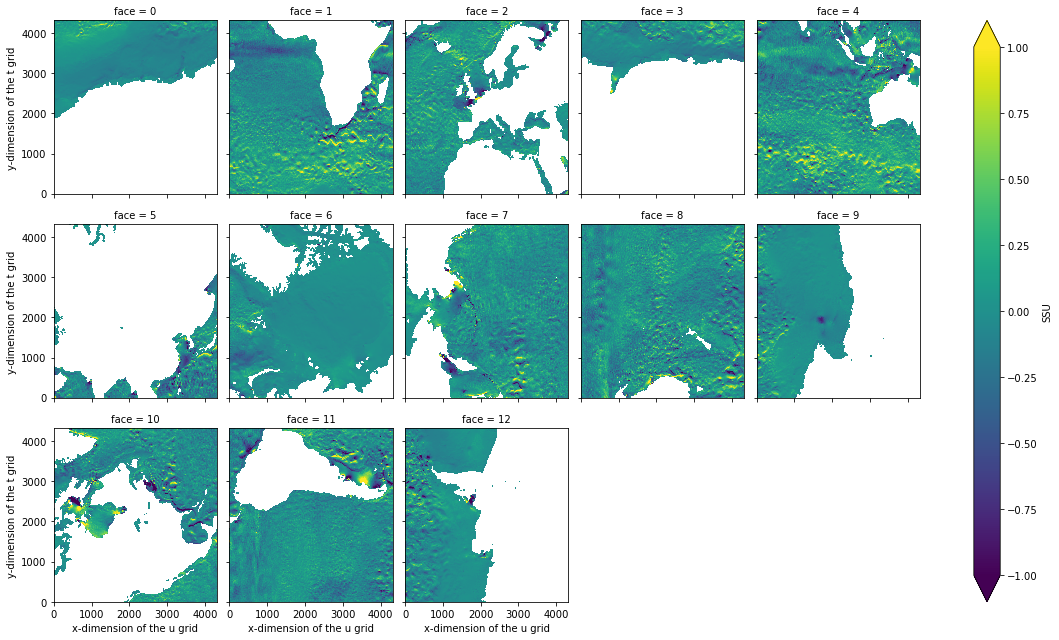

In [8]:
ds.SSU.plot(col='face', col_wrap=5, vmin=-1., vmax=1.)

(<Figure size 432x288 with 12 Axes>,
 array([[<AxesSubplot:xlabel='x-dimension of the u grid', ylabel='y-dimension of the t grid'>,
         <AxesSubplot:xlabel='x-dimension of the u grid', ylabel='y-dimension of the t grid'>,
         <AxesSubplot:xlabel='y-dimension of the t grid', ylabel='x-dimension of the u grid'>,
         <AxesSubplot:xlabel='y-dimension of the t grid', ylabel='x-dimension of the u grid'>],
        [<AxesSubplot:xlabel='x-dimension of the u grid', ylabel='y-dimension of the t grid'>,
         <AxesSubplot:xlabel='x-dimension of the u grid', ylabel='y-dimension of the t grid'>,
         <AxesSubplot:xlabel='y-dimension of the t grid', ylabel='x-dimension of the u grid'>,
         <AxesSubplot:xlabel='y-dimension of the t grid', ylabel='x-dimension of the u grid'>],
        [<AxesSubplot:xlabel='x-dimension of the u grid', ylabel='y-dimension of the t grid'>,
         <AxesSubplot:xlabel='x-dimension of the u grid', ylabel='y-dimension of the t grid'>,
         <A

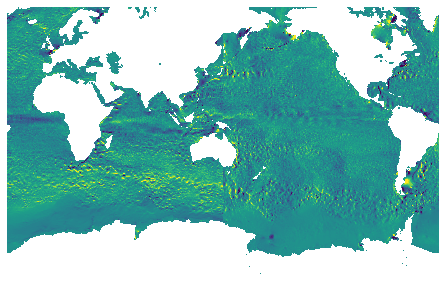

In [9]:
_ = quick_llc_plot(ds.SSU, vmin=-1., vmax=1., 
               add_colorbar=False, axis_off=True)

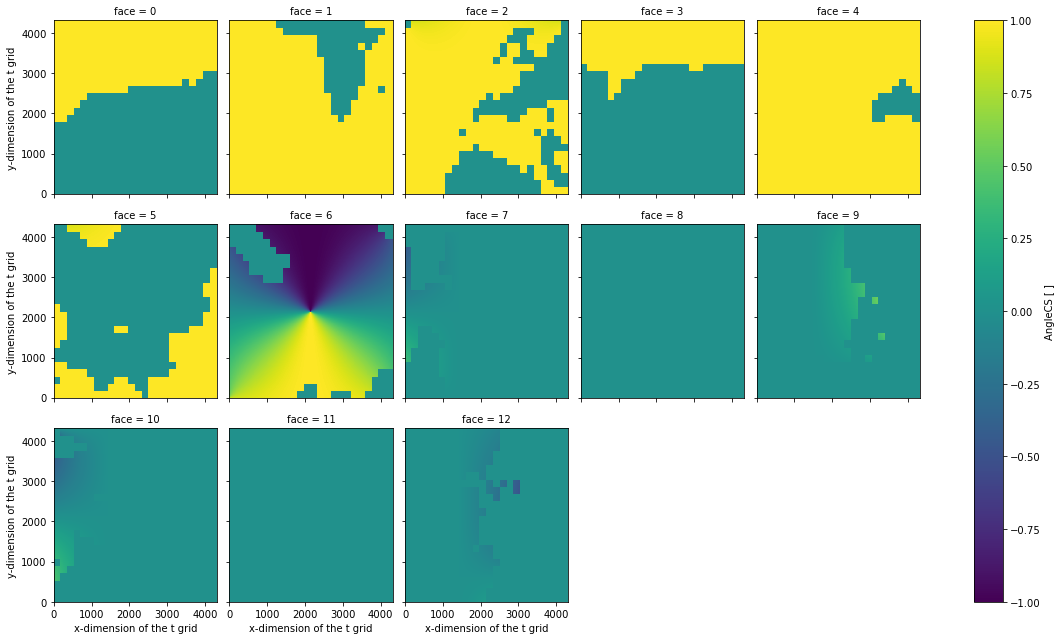

In [17]:
ds.CS.plot(col='face', col_wrap=5, vmin=-1., vmax=1.)

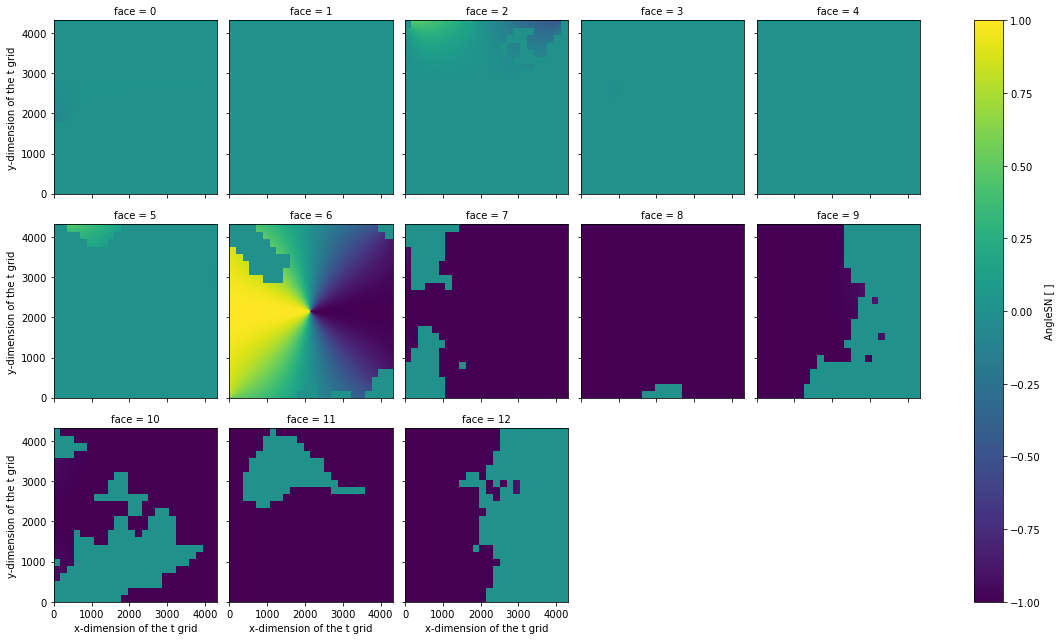

In [18]:
ds.SN.plot(col='face', col_wrap=5, vmin=-1., vmax=1.)

---

## compute and plot rotated currents


In [19]:
# should do proper grid interpolation instead of renaming
U =  ds.SSU.rename({'i_g': 'i'})*ds.CS - ds.SSV.rename({'j_g': 'j'})*ds.SN
V =  ds.SSU.rename({'i_g': 'i'})*ds.SN + ds.SSV.rename({'j_g': 'j'})*ds.CS
U.persist()
V.persist()

<xarray.DataArray (face: 13, j: 1080, i: 1080)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.01733791, -0.03583708, -0.07225867, ..., -0.15290844,
         -0.16210914, -0.16710287],
        [-0.02425875, -0.04242913, -0.06801549, ..., -0.11669544,
         -0.13287205, -0.13456585],
        [ 0.03984349,  0.02832085, -0.03223767, ..., -0.05198651,
         -0.12276634, -0.16003385]],

       [[ 0.05299944,  0.01098607, -0.03167653, ..., -0.01316916,
         -0.0577074 , -0.13083579],
        [ 0.05931383,  0.05667536, -0.06514147, ...,  0.02732146,
         -0.00694521, -0.06176148],
        [ 0.11660346,  0.05467376, -0.00065483, ...,  0.06099602,
          0.01338942, -0.00081586],
...
        [ 0.02615963,  0.09807592, -0.00127196, ...,  0.20666324,
          0.22978522,  0.232425  ],
        [ 0.03403165,  0.17694432,  0.05450968, ...,  0.2803804 ,
          0.256482  ,  0.19784823],
        [ 0.09892657,  0.07821038,  0.10319441, ...,  0.20541792,
          0.12926412,  0.0857306 ]],

       [[ 0.06774484,  0.11585082,  0.06709934, ...,         nan,
                 nan,         nan],
        [ 0.10510496,  0.11242324,  0.11159258, ...,         nan,
                 nan,         nan],
        [ 0.15007363,  0.08373542,  0.15254362, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.1847625 ,  0.110989  ,  0.05907439, ...,         nan,
                 nan,         nan],
        [ 0.16068982,  0.1430889 ,  0.0775188 , ...,         nan,
                 nan,         nan],
        [ 0.07343286,  0.0744188 ,  0.04052282, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j        (j) int64 0 4 8 12 16 20 24 ... 4292 4296 4300 4304 4308 4312 4316
  * i        (i) int64 0 4 8 12 16 20 24 ... 4292 4296 4300 4304 4308 4312 4316
    iters    int64 228096
    time     float64 5.702e+06
    CS       (face, j, i) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SN       (face, j, i) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Depth    (face, j, i) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    XC       (face, j, i) float32 -114.9 -114.9 -114.9 ... -113.5 -114.0 -114.5
    YC       (face, j, i) float32 -88.18 -88.19 -88.2 ... -88.16 -88.17 -88.17
    hFacC    (face, j, i) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    rA       (face, j, i) float32 1.555e+05 1.555e+05 ... 1.559e+05 1.556e+05

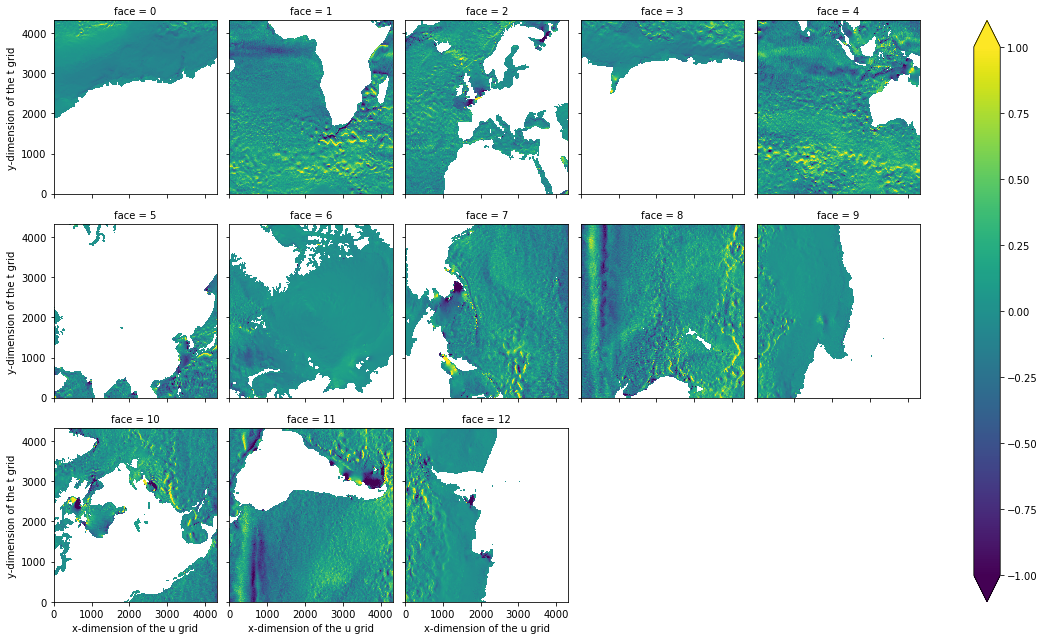

In [20]:
U.plot(col='face', col_wrap=5, vmin=-1., vmax=1.)

(<Figure size 432x288 with 12 Axes>,
 array([[<AxesSubplot:xlabel='x-dimension of the u grid', ylabel='y-dimension of the t grid'>,
         <AxesSubplot:xlabel='x-dimension of the u grid', ylabel='y-dimension of the t grid'>,
         <AxesSubplot:xlabel='y-dimension of the t grid', ylabel='x-dimension of the u grid'>,
         <AxesSubplot:xlabel='y-dimension of the t grid', ylabel='x-dimension of the u grid'>],
        [<AxesSubplot:xlabel='x-dimension of the u grid', ylabel='y-dimension of the t grid'>,
         <AxesSubplot:xlabel='x-dimension of the u grid', ylabel='y-dimension of the t grid'>,
         <AxesSubplot:xlabel='y-dimension of the t grid', ylabel='x-dimension of the u grid'>,
         <AxesSubplot:xlabel='y-dimension of the t grid', ylabel='x-dimension of the u grid'>],
        [<AxesSubplot:xlabel='x-dimension of the u grid', ylabel='y-dimension of the t grid'>,
         <AxesSubplot:xlabel='x-dimension of the u grid', ylabel='y-dimension of the t grid'>,
         <A

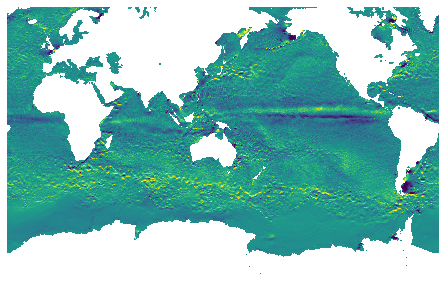

In [21]:
quick_llc_plot(U, vmin=-1., vmax=1., 
               add_colorbar=False, axis_off=True)

(<Figure size 432x288 with 12 Axes>,
 array([[<AxesSubplot:xlabel='x-dimension of the u grid', ylabel='y-dimension of the t grid'>,
         <AxesSubplot:xlabel='x-dimension of the u grid', ylabel='y-dimension of the t grid'>,
         <AxesSubplot:xlabel='y-dimension of the t grid', ylabel='x-dimension of the u grid'>,
         <AxesSubplot:xlabel='y-dimension of the t grid', ylabel='x-dimension of the u grid'>],
        [<AxesSubplot:xlabel='x-dimension of the u grid', ylabel='y-dimension of the t grid'>,
         <AxesSubplot:xlabel='x-dimension of the u grid', ylabel='y-dimension of the t grid'>,
         <AxesSubplot:xlabel='y-dimension of the t grid', ylabel='x-dimension of the u grid'>,
         <AxesSubplot:xlabel='y-dimension of the t grid', ylabel='x-dimension of the u grid'>],
        [<AxesSubplot:xlabel='x-dimension of the u grid', ylabel='y-dimension of the t grid'>,
         <AxesSubplot:xlabel='x-dimension of the u grid', ylabel='y-dimension of the t grid'>,
         <A

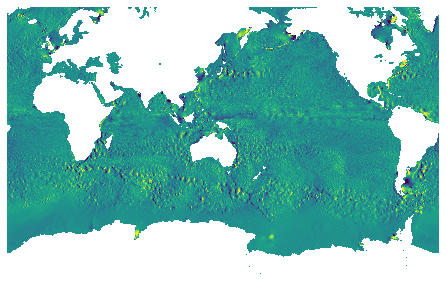

In [22]:
quick_llc_plot(V, vmin=-1., vmax=1., 
               add_colorbar=False, axis_off=True)

---

In [10]:
# kill scheduler, workers
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError


In [ ]:
# restart workers
client.restart()

In [ ]:
client